In [1]:
import numpy as np
import pandas as pd

In [2]:
%precision 3

'%.3f'

In [3]:
pd.set_option('precision', 3)

In [4]:
df=pd.read_csv('../data/ch2_scores_em.csv', index_col='student number')

In [5]:
df.head()

,english,mathematics
student number,,
1,42,65
2,69,80
3,56,63
4,41,63
5,57,76


In [6]:
scores=np.array(df['english'])[:10]
scores

array([42, 69, 56, 41, 57, 48, 65, 49, 65, 58])

In [7]:
scores_df=pd.DataFrame({'score':scores},
                      index=pd.Index(['A','B','C','D','E','F','G','H','I','J'], name = 'student'))
scores_df

,score
student,
A,42
B,69
C,56
D,41
E,57
F,48
G,65
H,49
I,65


In [8]:
sum(scores)/len(scores)

55.0

In [9]:
np.mean(scores)

55.0

mean = np.mean(scores)
deviation = scores - mean
deviation

In [10]:
mean = np.mean(scores)
deviation= scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [11]:
sorted_scores=np.sort(scores)

In [12]:
sorted_scores

array([41, 42, 48, 49, 56, 57, 58, 65, 65, 69])

In [13]:
np.median(scores)

56.5

In [14]:
scores_df.median()

score    56.5
dtype: float64

In [15]:
pd.Series([1,1,1,2,2,3]).mode()

0    1
dtype: int64

In [16]:
mean=np.mean(scores)
deviation = scores - mean
deviation

array([-13.,  14.,   1., -14.,   2.,  -7.,  10.,  -6.,  10.,   3.])

In [17]:
another_scores = [50, 60, 58, 54, 51, 56, 57, 53,52,59]
another_mean = np.mean(another_scores)
another_deviation = another_scores - another_mean
another_deviation

array([-5.,  5.,  3., -1., -4.,  1.,  2., -2., -3.,  4.])

In [18]:
np.mean(deviation)

0.0

In [19]:
summary_df = scores_df.copy()
summary_df['deviation']=deviation
summary_df

,score,deviation
student,,
A,42,-13.0
B,69,14.0
C,56,1.0
D,41,-14.0
E,57,2.0
F,48,-7.0
G,65,10.0
H,49,-6.0
I,65,10.0


In [20]:
np.mean(deviation**2)

86.0

In [21]:
summary_df['square of deviation']=np.square(deviation)
summary_df

,score,deviation,square of deviation
student,,,
A,42,-13.0,169.0
B,69,14.0,196.0
C,56,1.0,1.0
D,41,-14.0,196.0
E,57,2.0,4.0
F,48,-7.0,49.0
G,65,10.0,100.0
H,49,-6.0,36.0
I,65,10.0,100.0


In [22]:
summary_df.mean()

score                  55.0
deviation               0.0
square of deviation    86.0
dtype: float64

In [23]:
np.sqrt(np.var(scores, ddof=0))

9.273618495495704

In [24]:
np.max(scores)-np.min(scores)

28

In [25]:
scores_Q1 = np.percentile(scores, 25)
scores_Q3 = np.percentile(scores, 75)
scores_IQR = scores_Q3 - scores_Q1
scores_IQR


15.0

In [26]:
pd.Series(scores).describe()

count    10.000
mean     55.000
std       9.775
min      41.000
25%      48.250
50%      56.500
75%      63.250
max      69.000
dtype: float64

In [27]:
z = (scores - np.mean(scores)) / np.std(scores)
z

array([-1.402,  1.51 ,  0.108, -1.51 ,  0.216, -0.755,  1.078, -0.647,
        1.078,  0.323])

In [28]:
np.mean(z), np.std(z, ddof=0)

(-1.6653345369377347e-17, 0.9999999999999999)

In [29]:
z= 50+10*(scores- np.mean(scores))/np.std(scores)
z

array([35.982, 65.097, 51.078, 34.903, 52.157, 42.452, 60.783, 43.53 ,
       60.783, 53.235])

In [30]:
scores_df['deviation value']=z
scores_df

,score,deviation value
student,,
A,42,35.982
B,69,65.097
C,56,51.078
D,41,34.903
E,57,52.157
F,48,42.452
G,65,60.783
H,49,43.530
I,65,60.783


In [31]:
english_scores = np.array(df['english'])
pd.Series(english_scores).describe()

count    50.00
mean     58.38
std       9.80
min      37.00
25%      54.00
50%      57.50
75%      65.00
max      79.00
dtype: float64

In [32]:
# 0점부터 100점까지 계급수를 10으로 분류
freq, _ =np.histogram(english_scores, bins=10, range=(0,100))
freq 

array([ 0,  0,  0,  2,  8, 16, 18,  6,  0,  0])

In [33]:
freq_class = [f'{i}~{i+10}' for i in range(0, 100, 10)]

freq_dist_df = pd.DataFrame({'frequency' :freq},
                           index = pd. Index(freq_class,
                                            name = 'class'))
freq_dist_df

,frequency
class,
0~10,0
10~20,0
20~30,0
30~40,2
40~50,8
50~60,16
60~70,18
70~80,6
80~90,0


In [34]:
# 계급값 : 계급을 대표하는 값
class_value = [(i+(i+10))//2 for i in range(0, 100, 10)]
class_value

[5, 15, 25, 35, 45, 55, 65, 75, 85, 95]

In [35]:
# 상대도수 : 계끕의 데이터가 어느 정도의 비율을 차지하고 있는지
rel_freq = freq/freq.sum()
rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.16, 0.32, 0.36, 0.12, 0.  , 0.  ])

In [36]:
# 누적상대도수 : 해당 계급까지의 상대도수의 합
cum_rel_freq = np.cumsum(rel_freq)
cum_rel_freq

array([0.  , 0.  , 0.  , 0.04, 0.2 , 0.52, 0.88, 1.  , 1.  , 1.  ])

In [37]:
freq_dist_df['class value']= class_value
freq_dist_df['relative frequency'] = rel_freq
freq_dist_df['cumulative relative frequency']= cum_rel_freq
freq_dist_df=freq_dist_df[['class value', 'frequency', 'relative frequency', 'cumulative relative frequency']]

freq_dist_df

,class value,frequency,relative frequency,cumulative relative frequency
class,,,,
0~10,5,0,0.00,0.00
10~20,15,0,0.00,0.00
20~30,25,0,0.00,0.00
30~40,35,2,0.04,0.04
40~50,45,8,0.16,0.20
50~60,55,16,0.32,0.52
60~70,65,18,0.36,0.88
70~80,75,6,0.12,1.00
80~90,85,0,0.00,1.00


In [38]:
freq_dist_df.loc[freq_dist_df['frequency'].idxmax(), 'class value']

65

In [42]:
import matplotlib.pyplot as plt
%matplotlib inline

AttributeError: 'AxesSubplot' object has no attribute 'set_xlable'

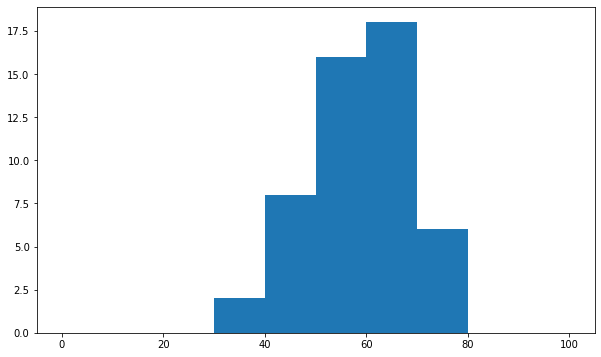

In [45]:
fig = plt.figure(figsize=(10, 6))
ax = fig.add_subplot(111)

freq, _, _=ax.hist(english_scores, bins=10, range=(0, 100))
ax.set_xlable('score')
ax.set_ylable('person number')
ax.set_xticks(np.linspace(0, 100, 10+1))
ax.set_yticks(np.arange(0, freq.max()+1))
plt.show()